# Tutorial 1: Data cleaning & visualization 

---

### Introduction

Welcome! This tutorial will show you how to visualize infrared spectroscopy samples from apples using python. From this tutorial you will learn:

 - how to read data into python from an Excel file
 - how to use dataframes (pandas package)
 - how to visualise infrared data
 - how to perform data standardization

For this tutorial, we have three kinds of apples namely Golden Delicious (`GD`), Granny Smith (`GS`), and Royal Gala (`RG`). The main practical purpose is to use infrared spectrum data to classify between bruised (`B`) sound (`S`) samples.

All tutorials will use `GS` data, while participants have to solve the exercises on the other two data sets.

---

First we import some libraries:

In [1]:
# ___Cell no. 1___

import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import matplotlib.pyplot as plt # This displays graphs once they have been created
import numpy as np # For handling N-DIMENSIONAL ARRAYS

The above statements define the prefixes 'pd' and 'sns' which will be used to identify pandas and seaborn functions respectively in the following code.

---

### Reading in data  

The following code does the following:
- reads data from an Excel file
- converts the Excel file format into a Pandas dataframe 

In [2]:
# ___Cell no. 2___
import os 
df = pd.read_excel(os.path.abspath('../data/Detect-GS.xlsx')) # change the directory as needed

Since the excel files lives in a sibling directory `../apple_classification/data` we have to use `os.path.abspath` as it returns the absolute path of current working directory with file name `../data/Detect-GD.xlsx` (see more information at [**this link**](https://www.geeksforgeeks.org/python-os-path-abspath-method-with-example/))

---

### Examining data 

First let's take a look at the raw infrared data

In [3]:
# ___Cell no. 3___
df.head(5) # shows the first 5 rows of the data frame

,Sample,Condition,Age,Source,11995.49,11991.63,11987.78,11983.92,11980.06,11976.21,...,4034.497,4030.64,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.64,3999.783
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607
4,GS-ch-bruise1h-11a,B,1h,S1,-0.166998,-0.166739,-0.166921,-0.166882,-0.166638,-0.166418,...,0.520031,0.521815,0.520814,0.518175,0.518827,0.523526,0.529133,0.532134,0.531992,0.529879


In the above dataframe, the rows correspond to different apple `GS` samples, while the columns give the values of 2078 variables, which can be explained as follows:
- Sample ID
- Condition: Bruised (B) or Sound (S) apple
- Age (in hours)
- Source
- 11995.49,...,3999.783: evenly-spaced infrared wave numbers at which intensities are measured.

We may verify the shape of the data frame:

In [4]:
# ___Cell no. 4___


df_shape = df.shape # "df.shape" produces a tuple of 2 numbers 
print("the shape of the infrared intensity data is "+str(df_shape) ) 

# The individual numbers in the tuple are accessed as follows:
print("where " + str(df_shape[0]) +" is the number of rows, and")
print(str(df_shape[1]) +" is the number of columns")

the shape of the infrared intensity data is (503, 2078)
where 503 is the number of rows, and
2078 is the number of columns


This shows that we are working with high-dimensional data. One of the major tasks is to reduce the data. This can be done manually using feature engineering methods, or automatically using deep learning. However, given the small number of samples we will be focusing on using feature engineering methods, this will be explored more in tutorial 2.


**Exercise 1:** Display the first 5 elements and the shape of the two other data sets (GD, RG)
<br>


---

In [17]:
#  ___ code here ____

#read the first data set and the second data sets
gd = pd.read_excel(os.path.abspath('../data/Detect-GD.xlsx')) #GD data
rg = pd.read_excel(os.path.abspath('../data/Detect-RG.xlsx')) #RG data



In [18]:
gd.head(5)


,Sample,Condition,Age,Source,11995.49,11991.63,11987.78,11983.92,11980.06,11976.21,...,4034.497,4030.64,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.64,3999.783
0,GD-ch-bruise1.5h-10a,B,1h,S1,-0.083126,-0.082581,-0.082173,-0.081704,-0.081251,-0.080829,...,1.208914,1.216652,1.219303,1.207366,1.191071,1.185219,1.183722,1.175261,1.168796,1.191991
1,GD-ch-bruise1.5h-10b,B,1h,S1,-0.154684,-0.154762,-0.154668,-0.154153,-0.153504,-0.153067,...,0.744595,0.745167,0.743545,0.744555,0.750424,0.752385,0.752032,0.755532,0.755115,0.747916
2,GD-ch-bruise1.5h-10c,S,1h,S1,-0.066006,-0.065688,-0.065200,-0.064603,-0.064006,-0.063497,...,1.443587,1.456797,1.474139,1.478318,1.455842,1.425429,1.414297,1.446042,1.510794,1.534620
3,GD-ch-bruise1.5h-10d,S,1h,S1,-0.110366,-0.110041,-0.109542,-0.109117,-0.108661,-0.108094,...,1.257423,1.262108,1.269531,1.262279,1.243150,1.235391,1.237499,1.246332,1.265530,1.268394
4,GD-ch-bruise1.5h-11a,B,1h,S1,-0.142115,-0.141852,-0.141603,-0.141129,-0.140701,-0.140477,...,0.697953,0.696903,0.699350,0.704406,0.707838,0.709304,0.710684,0.711052,0.707295,0.703002


In [19]:
rg.head(5)



,Sample,Condition,Age,Source,11995.49,11991.63,11987.78,11983.92,11980.06,11976.21,...,4034.497,4030.64,4026.783,4022.926,4019.069,4015.211,4011.354,4007.497,4003.64,3999.783
0,RG-ch-bruise1.5h-10a,B,1h,S1,-0.073562,-0.073781,-0.073957,-0.073707,-0.072784,-0.072192,...,1.431078,1.421277,1.418090,1.420809,1.427156,1.431252,1.421493,1.406952,1.413567,1.418298
1,RG-ch-bruise1.5h-10b,B,1h,S1,-0.109298,-0.109838,-0.110297,-0.110122,-0.109260,-0.108452,...,1.101811,1.095996,1.094685,1.095122,1.095522,1.094201,1.091799,1.091893,1.092368,1.081785
2,RG-ch-bruise1.5h-10c,S,1h,S1,-0.110615,-0.111461,-0.111813,-0.111651,-0.110756,-0.109691,...,1.125451,1.127347,1.123727,1.117350,1.116847,1.121172,1.127742,1.139490,1.142334,1.132922
3,RG-ch-bruise1.5h-10d,S,1h,S1,-0.114786,-0.115564,-0.116114,-0.115950,-0.115114,-0.114281,...,1.137944,1.131435,1.129920,1.137164,1.144162,1.140099,1.132696,1.133398,1.145063,1.161662
4,RG-ch-bruise1.5h-11a,B,1h,S1,-0.146608,-0.147469,-0.147789,-0.147515,-0.146668,-0.145834,...,0.641977,0.640554,0.639490,0.637811,0.634665,0.630547,0.625248,0.619767,0.617546,0.619238


In [23]:
gd_shape=gd.shape

print("The shape of the Golden Delicious infrared data is: ", gd_shape)
print("Where ", gd_shape[0], "is the number of rows and ", gd_shape[1], " is the number of columns")

The shape of the Golden Delicious infrared data is:  (547, 2078)
Where  547 is the number of rows and  2078  is the number of columns


In [24]:
rg_shape=rg.shape

print("The shape of the Royal Gala infrared data is: ", rg_shape)
print("Where ", rg_shape[0], "is the number of rows and ", rg_shape[1], " is the number of columns")

The shape of the Royal Gala infrared data is:  (562, 2078)
Where  562 is the number of rows and  2078  is the number of columns


### Cleaning data

First, let us change the column names, because wavelength values are more comprehensible than wavenumbers. The wavelengths are measured in nanometers. 

In [29]:
# ___Cell no. 5___

wavenumbers = np.float_(df.columns[4:])
wavelengths = (1/wavenumbers)*10**7 # changing the wavenumber to a wave length
print("\n Example: wave number "+str(wavenumbers[0])+" in inverse centimeters converts to a wavelength of "+ str(wavelengths[0]) + " in nanometers\n")

df.columns.values[4:] = np.round(wavelengths, 3) # getting just up to 3 decimal numbers
# Print first few rows
df.head(4)


 Example: wave number 11995.49 in inverse centimeters converts to a wavelength of 833.6466455309454 in nanometers



,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GS-ch-bruise1h-10a,B,1h,S1,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,GS-ch-bruise1h-10b,B,1h,S1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,GS-ch-bruise1h-10c,S,1h,S1,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305
3,GS-ch-bruise1h-10d,S,1h,S1,-0.143663,-0.143526,-0.143718,-0.143459,-0.142628,-0.142030,...,0.682872,0.683971,0.688426,0.692536,0.690982,0.685393,0.679534,0.677676,0.682072,0.689607


In [30]:
wavenumbers

array([11995.49 , 11991.63 , 11987.78 , ...,  4007.497,  4003.64 ,
        3999.783])

Now let's check the frequencies of bruised and sound `GS` apples. 

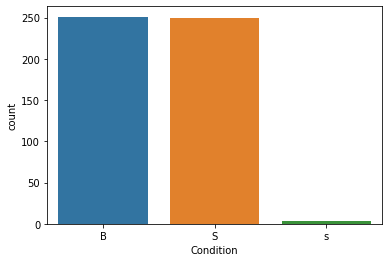

In [31]:
# ___Cell no. 6___

ax = sns.countplot(x="Condition",data=df)

The graph shows that we have three clases of `GS` apples. However this is a mistake--the small `s` should be changed to `S`, giving two classes (this shows why you should always look at your data!). 

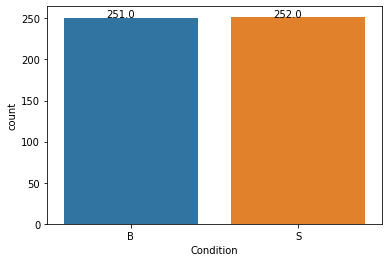

In [32]:
# ___Cell no. 7___

df['Condition'] = df['Condition'].str.upper()
ax = sns.countplot(x="Condition",data=df)

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Now we're done cleaning the `GS' data.  You can do the rest!


**Exercise 2:** Clean the other two datasets
<br>

In [33]:
#  ___ code here ____
#Cleaning the golden delicious
wavenumber_gd = np.float_(gd.columns[4:])
wavelength_gd = (1/wavenumber_gd)*10**7 # changing the wavenumber to a wave length
print("\n Example: wave number "+str(wavenumber_gd[0])+" in inverse centimeters converts to a wavelength of "+ str(wavelength_gd[0]) + " in nanometers\n")

gd.columns.values[4:] = np.round(wavelength_gd, 3) # getting just up to 3 decimal numbers
# Print first few rows
gd.head(4)


 Example: wave number 11995.49 in inverse centimeters converts to a wavelength of 833.6466455309454 in nanometers



,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,GD-ch-bruise1.5h-10a,B,1h,S1,-0.083126,-0.082581,-0.082173,-0.081704,-0.081251,-0.080829,...,1.208914,1.216652,1.219303,1.207366,1.191071,1.185219,1.183722,1.175261,1.168796,1.191991
1,GD-ch-bruise1.5h-10b,B,1h,S1,-0.154684,-0.154762,-0.154668,-0.154153,-0.153504,-0.153067,...,0.744595,0.745167,0.743545,0.744555,0.750424,0.752385,0.752032,0.755532,0.755115,0.747916
2,GD-ch-bruise1.5h-10c,S,1h,S1,-0.066006,-0.065688,-0.065200,-0.064603,-0.064006,-0.063497,...,1.443587,1.456797,1.474139,1.478318,1.455842,1.425429,1.414297,1.446042,1.510794,1.534620
3,GD-ch-bruise1.5h-10d,S,1h,S1,-0.110366,-0.110041,-0.109542,-0.109117,-0.108661,-0.108094,...,1.257423,1.262108,1.269531,1.262279,1.243150,1.235391,1.237499,1.246332,1.265530,1.268394


In [59]:
#cleaning the Royal Gold
wavenumber_rg = np.float_(rg.columns[4:])
wavelength_rg = (1/wavenumber_rg)*10**7 # changing the wavenumber to a wave length
print("\n Example: wave number "+str(wavenumber_rg[0])+" in inverse centimeters converts to a wavelength of "+ str(wavelength_rg[0]) + " in nanometers\n")
.0............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
rg.columns.values[4:] = np.round(wavelength_rg, 3) # getting just up to 3 decimal numbers
# Print first few rows
rg.head(4)



 Example: wave number 11995.485 in inverse centimeters converts to a wavelength of 833.646993014455 in nanometers



,Sample,Condition,Age,Source,833.647,833.915,834.183,834.451,834.72,834.989,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,RG-ch-bruise1.5h-10a,B,1h,S1,-0.073562,-0.073781,-0.073957,-0.073707,-0.072784,-0.072192,...,1.431078,1.421277,1.418090,1.420809,1.427156,1.431252,1.421493,1.406952,1.413567,1.418298
1,RG-ch-bruise1.5h-10b,B,1h,S1,-0.109298,-0.109838,-0.110297,-0.110122,-0.109260,-0.108452,...,1.101811,1.095996,1.094685,1.095122,1.095522,1.094201,1.091799,1.091893,1.092368,1.081785
2,RG-ch-bruise1.5h-10c,S,1h,S1,-0.110615,-0.111461,-0.111813,-0.111651,-0.110756,-0.109691,...,1.125451,1.127347,1.123727,1.117350,1.116847,1.121172,1.127742,1.139490,1.142334,1.132922
3,RG-ch-bruise1.5h-10d,S,1h,S1,-0.114786,-0.115564,-0.116114,-0.115950,-0.115114,-0.114281,...,1.137944,1.131435,1.129920,1.137164,1.144162,1.140099,1.132696,1.133398,1.145063,1.161662


Having changed our columns from wavenumbers into wavelengths in nanometers, we then want to observe the frequency of the data in according to the condition of the apples

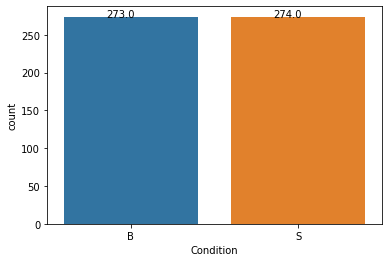

In [39]:
#using seaborn counterplot, we will plot the frquencies
#for the Golden declicious:

gd_cond = sns.countplot(x="Condition",data=gd)
#To display the number of the bruised and sound on the plots
for a in gd_cond.patches:
    gd_cond.annotate('{:.1f}'.format(a.get_height()), (a.get_x()+0.25, a.get_height()+0.01))

plt.show()

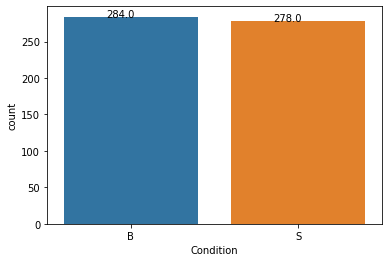

In [40]:
#for the royal gold
rg_cond = sns.countplot(x="Condition",data=rg)

#To display the number of the bruised and sound on the plots
for b in rg_cond.patches:
    rg_cond.annotate('{:.1f}'.format(b.get_height()), (b.get_x()+0.25, b.get_height()+0.01))

plt.show()

---

### Visualising the data 

Before we visualise the data, let us separate the dataframe into inputs (X) outputs (Y)

In [41]:
# ___Cell no. 8___

#Inputs (which is the infrared spectral data)
X = df.iloc[:, 4: ] #taking the data from the wavelength columns
X.head(3)

,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.113748,-0.113815,-0.114197,-0.114321,-0.114032,-0.113495,-0.113074,-0.113266,-0.114108,-0.114498,...,0.845574,0.850478,0.849688,0.844572,0.844248,0.849826,0.854541,0.849297,0.836767,0.830801
1,-0.161664,-0.161498,-0.161212,-0.161013,-0.160861,-0.160329,-0.159698,-0.159639,-0.160184,-0.160504,...,0.428670,0.431408,0.433148,0.431059,0.426104,0.422003,0.420373,0.419252,0.419077,0.421115
2,-0.139064,-0.138784,-0.138928,-0.138786,-0.138244,-0.137692,-0.137664,-0.138295,-0.139098,-0.139391,...,0.809659,0.808975,0.806819,0.805404,0.807540,0.810868,0.814169,0.812831,0.799328,0.783305


In [42]:
# ___Cell no. 9___

#outputs (Sound and Bruised)
Y = df['Condition'] #taking the condition column as our outputs

Visualising all the infrared samples at once will introduce a noisy graph, so let us select randomly about 50 samples.

In [81]:
# ___Cell no. 10___

n = 50
np.random.seed(0)
randIx  = np.random.choice(len(df), n, replace=False)# Random sample without replacement (avoids duplicates)
randIx # those are the indices of randomly selected 50 apple samples

array([ 90,  97, 475, 340, 395,  15, 318, 416, 159, 153, 434, 253, 254,
       219, 171, 298, 471, 194, 154,  37, 208, 385, 461, 108,  45, 402,
        21, 375,  96, 236, 391, 118, 124, 499, 205, 362, 313, 452, 268,
       191, 319,  46, 406, 224,  76,   1, 456, 351, 421, 102])

Now let us visualise the samples

**Exercise 3:** Notice that every time you run the cell above a different set of number will appear,
Change the code above so that the same set of numbers apppears every time.

hint: google search the following key words: `seed`, `numpy`
<br>

Finish the display. We convert the dataframes to numpy in order to use the power of numpy fancy indexing.

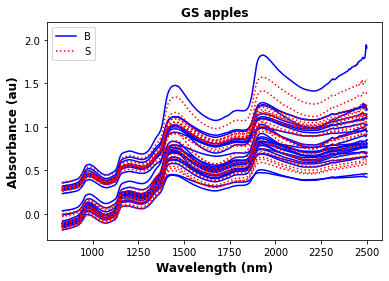

In [82]:
# ___Cell no. 11___

# Convert to numpy
Xn = X.to_numpy(dtype = 'float')
Yn = Y.to_numpy(dtype = 'str')

# Select only the ones to display
Xn = Xn[randIx,:]
Yn = Yn[randIx]

# number of samples, number of wavelengths
ns,nw = np.shape(Xn)

# Select Sound and Bruised samples
S_Flag = (Yn =='S')
B_Flag = (Yn == 'B')

########

plt.figure(figsize=(6, 4))

# Since we are plotting a 2D numpy array, we will need to be carful with the labels, as we will need just one label to present the type of graph (S, B) 

plt.plot(np.array(X.columns),np.transpose(Xn[B_Flag,:])[:,:1],'b-', label = "B") # just graph the first wavelength of type 'B' with the lables 
plt.plot(np.array(X.columns),np.transpose(Xn[B_Flag,:])[:,1:],'b-') # graphs the rest of the wavelengths of type 'B' without thier labels 
    
# We make the second curve dashed so that it doesn't cover up the first
plt.plot(np.array(X.columns),np.transpose(Xn[S_Flag,:])[:,:1],'r:', label = "S")  # just graph the first wavelength of type 'S' without the lables
plt.plot(np.array(X.columns),np.transpose(Xn[S_Flag,:])[:,1:],'r:') # graphs the rest of the wavelengths of type 'S' without thier labels

plt.title("GS apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Absorbance (au)", fontweight ='bold', fontsize =12)
plt.ylim([-.3,2.2])

plt.legend()

plt.show()

**Exercise 4:** Do the visualization for the other 2 datasets
<br>

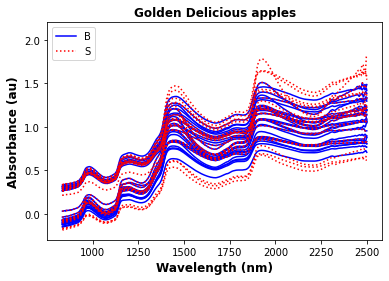

In [88]:
#  ___ code here ____
#Visualization of the Golden delicious
Xgd=gd.iloc[ : ,4:] #taking all the wavelngth columns
Ygd=gd['Condition'] #taking the conditions column

#to visualize only 50 random samples 
num=50
np.random.seed(1)
randGd=np.random.choice(len(gd),num,replace=False)

#values to dispaly
Plotx_gd=Xgd.to_numpy(dtype= 'float')
Ploty_gd=Ygd.to_numpy(dtype= 'str')

Plotx_gd=Plotx_gd[randGd,: ]
Ploty_gd=Ploty_gd[randGd]

S_flag=(Ploty_gd=='S')
B_flag=(Ploty_gd=='B')

#
plt.figure(figsize=(6, 4))

# Since we are plotting a 2D numpy array, we will need to be carful with the labels, as we will need just one label to present the type of graph (S, B) 

plt.plot(np.array(Xgd.columns),np.transpose(Plotx_gd[B_flag,:])[:,:1],'b-', label = "B") # just graph the first wavelength of type 'B' with the lables 
plt.plot(np.array(Xgd.columns),np.transpose(Plotx_gd[B_flag,:])[:,1:],'b-') # graphs the rest of the wavelengths of type 'B' without thier labels 
    
# We make the second curve dashed so that it doesn't cover up the first
plt.plot(np.array(Xgd.columns),np.transpose(Plotx_gd[S_Flag,:])[:,:1],'r:', label = "S")  # just graph the first wavelength of type 'S' without the lables
plt.plot(np.array(Xgd.columns),np.transpose(Plotx_gd[S_Flag,:])[:,1:],'r:') # graphs the rest of the wavelengths of type 'S' without thier labels

plt.title("Golden Delicious apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Absorbance (au)", fontweight ='bold', fontsize =12)
plt.ylim([-.3,2.2])

plt.legend()

plt.show()

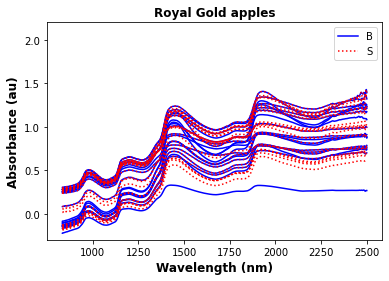

In [89]:
#  ___ code here ____
#Visualization of the Golden delicious
Xrg=rg.iloc[ : ,4:] #taking all the wavelngth columns
Yrg=rg['Condition'] #taking the conditions column

#to visualize only 50 random samples 
num=50
np.random.seed(2)
randRg=np.random.choice(len(rg),n,replace=False)

#values to dispaly
Plotx_rg=Xrg.to_numpy(dtype= 'float')
Ploty_rg=Yrg.to_numpy(dtype= 'str')

Plotx_rg=Plotx_rg[randRg,: ]
Ploty_rg=Ploty_rg[randRg]

S_flag=(Ploty_rg=='S')
B_flag=(Ploty_rg=='B')

#
plt.figure(figsize=(6, 4))

# Since we are plotting a 2D numpy array, we will need to be carful with the labels, as we will need just one label to present the type of graph (S, B) 

plt.plot(np.array(Xrg.columns),np.transpose(Plotx_rg[B_flag,:])[:,:1],'b-', label = "B") # just graph the first wavelength of type 'B' with the lables 
plt.plot(np.array(Xrg.columns),np.transpose(Plotx_rg[B_flag,:])[:,1:],'b-') # graphs the rest of the wavelengths of type 'B' without thier labels 
    
# We make the second curve dashed so that it doesn't cover up the first
plt.plot(np.array(Xrg.columns),np.transpose(Plotx_rg[S_Flag,:])[:,:1],'r:', label = "S")  # just graph the first wavelength of type 'S' without the lables
plt.plot(np.array(Xrg.columns),np.transpose(Plotx_rg[S_Flag,:])[:,1:],'r:') # graphs the rest of the wavelengths of type 'S' without thier labels

plt.title("Royal Gold apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Absorbance (au)", fontweight ='bold', fontsize =12)
plt.ylim([-.3,2.2])

plt.legend()

plt.show()

---

### Standard Scaler 

Standardizing features transforms them so that each individual feature has mean 0 and unit variance. This is an often-recommended pre-processing step  when working with many machine learning algorithms. (see more information at [**this link**](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/))


In [90]:
# ___Cell no. 12___

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

X = pd.DataFrame(x_scaled, columns = X.columns)

X

/opt/workshop/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/opt/workshop/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.808493,-0.807557,-0.808127,-0.809277,-0.810315,-0.809986,-0.808822,-0.810160,-0.814925,-0.817989,...,-0.408186,-0.390167,-0.395094,-0.416035,-0.416191,-0.393794,-0.376064,-0.394183,-0.438806,-0.461273
1,-1.045204,-1.042834,-1.040064,-1.039891,-1.041951,-1.041888,-1.039677,-1.039588,-1.042774,-1.045571,...,-1.982225,-1.971150,-1.966837,-1.972678,-1.980933,-1.986981,-1.992071,-1.999241,-2.010441,-2.015706
2,-0.933558,-0.930759,-0.930131,-0.930111,-0.930078,-0.929796,-0.930579,-0.933991,-0.938503,-0.941131,...,-0.543787,-0.546740,-0.556853,-0.563482,-0.553554,-0.538869,-0.526329,-0.530286,-0.579681,-0.641481
3,-0.956279,-0.954154,-0.953762,-0.953193,-0.951764,-0.951278,-0.952847,-0.956050,-0.959460,-0.960475,...,-1.022473,-1.018331,-1.003590,-0.988366,-0.989729,-1.006131,-1.027455,-1.034726,-1.020874,-0.996992
4,-1.071554,-1.068693,-1.068226,-1.068877,-1.070526,-1.072038,-1.072885,-1.074952,-1.078072,-1.079284,...,-1.637289,-1.630079,-1.636046,-1.644734,-1.633950,-1.608915,-1.587258,-1.577930,-1.585577,-1.603032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,-0.275430,-0.274320,-0.274200,-0.274479,-0.274608,-0.277242,-0.281107,-0.280976,-0.276278,-0.272611,...,-0.491406,-0.485925,-0.464286,-0.467758,-0.490807,-0.515450,-0.524820,-0.519023,-0.512824,-0.488398
499,-0.298707,-0.295062,-0.294296,-0.294798,-0.296765,-0.301067,-0.302066,-0.298652,-0.296644,-0.297677,...,-1.157046,-1.173071,-1.175726,-1.162370,-1.142283,-1.133218,-1.141321,-1.142113,-1.121310,-1.100813
500,-0.514468,-0.516540,-0.518424,-0.519333,-0.522529,-0.528154,-0.530454,-0.526756,-0.521762,-0.520717,...,-2.076827,-2.073034,-2.058804,-2.051791,-2.053137,-2.047367,-2.043846,-2.051221,-2.057879,-2.057166
501,0.014295,0.014717,0.016864,0.017340,0.015010,0.011359,0.009173,0.008830,0.009937,0.013005,...,1.524477,1.566631,1.663975,1.720487,1.749993,1.765076,1.669538,1.535575,1.491738,1.417050


now let us check the data after standardization

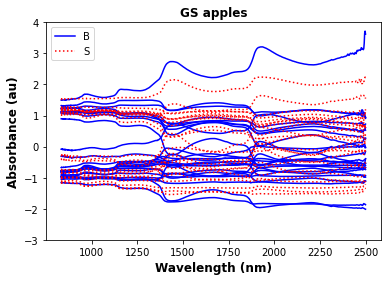

In [91]:
# ___Cell no. 13___

# Convert to numpy
Xn = X.to_numpy(dtype = 'float')
Yn = Y.to_numpy(dtype = 'str')

# Select only the ones to display
Xn = Xn[randIx,:]
Yn = Yn[randIx]

# number of samples, number of wavelengths
ns,nw = np.shape(Xn)

# Select Sound and Bruised samples
S_Flag = (Yn =='S')
B_Flag = (Yn == 'B')

#####

plt.figure(figsize=(6, 4))

plt.plot(np.array(X.columns),np.transpose(Xn[B_Flag,:])[:,:1],'b-', label = "B")
plt.plot(np.array(X.columns),np.transpose(Xn[B_Flag,:])[:,1:],'b-')
    
# We make the second curve dashed so that it doesn't cover up the first
plt.plot(np.array(X.columns),np.transpose(Xn[S_Flag,:])[:,:1],'r:', label = "S")
plt.plot(np.array(X.columns),np.transpose(Xn[S_Flag,:])[:,1:],'r:')

plt.title("GS apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Absorbance (au)", fontweight ='bold', fontsize =12)
plt.ylim([-3,4])

plt.legend()

plt.show()

We notice that there is a better separation for the data

**Exercise 5:** Do the standardization for the other 2 datasets
<br>

## Standardization Scaler for Golden Delicious

In [92]:
#  ___ code here ____
#For golden delicious
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xgd_scaled = scaler.fit_transform(Xgd)

Xgd = pd.DataFrame(xgd_scaled, columns = Xgd.columns)

Xgd



/opt/workshop/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/opt/workshop/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.731725,-0.730176,-0.728727,-0.727461,-0.726642,-0.725518,-0.724313,-0.725130,-0.725457,-0.723712,...,0.546056,0.574183,0.579372,0.526487,0.460490,0.443868,0.446451,0.415474,0.390292,0.485206
1,-1.091111,-1.092839,-1.093328,-1.092337,-1.090818,-1.089728,-1.089482,-1.089551,-1.088223,-1.086292,...,-1.292529,-1.288633,-1.289674,-1.279227,-1.254336,-1.253172,-1.262276,-1.249641,-1.248508,-1.277802
2,-0.645740,-0.645299,-0.643366,-0.641336,-0.639719,-0.638135,-0.636717,-0.636566,-0.635741,-0.633507,...,1.475302,1.522985,1.580512,1.583641,1.490876,1.385676,1.359118,1.489694,1.745120,1.845467
3,-0.868533,-0.868143,-0.866378,-0.865521,-0.864794,-0.862983,-0.861361,-0.861849,-0.862523,-0.861921,...,0.738139,0.753778,0.776696,0.740737,0.663161,0.640581,0.659312,0.697421,0.773504,0.788531
4,-1.027988,-1.027977,-1.027624,-1.026741,-1.026286,-1.026253,-1.025533,-1.024548,-1.023454,-1.022714,...,-1.477221,-1.479322,-1.463297,-1.435875,-1.420067,-1.422083,-1.425940,-1.426095,-1.437950,-1.456115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,-0.189975,-0.190901,-0.190235,-0.189389,-0.191424,-0.195746,-0.197555,-0.195286,-0.192623,-0.192692,...,0.367447,0.273551,0.263806,0.307068,0.286683,0.230939,0.209507,0.245654,0.369018,0.516014
543,-0.253723,-0.253582,-0.256496,-0.259383,-0.259734,-0.260837,-0.264524,-0.265279,-0.261194,-0.256631,...,-0.996738,-1.013982,-1.006576,-0.966727,-0.919994,-0.905660,-0.915580,-0.931365,-0.958646,-0.990852
544,-0.053975,-0.055295,-0.058111,-0.060912,-0.062198,-0.063607,-0.063761,-0.061905,-0.059853,-0.057656,...,0.475311,0.441656,0.425435,0.439938,0.400322,0.325418,0.342025,0.418953,0.416168,0.386331
545,-0.327951,-0.330562,-0.332937,-0.334624,-0.336659,-0.337866,-0.336044,-0.332283,-0.328306,-0.326333,...,-0.571854,-0.564302,-0.555436,-0.583571,-0.631514,-0.665160,-0.652100,-0.570231,-0.459750,-0.430918


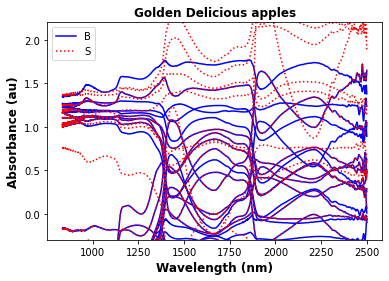

In [93]:

#values to dispaly
Plotx_gd=Xgd.to_numpy(dtype= 'float')
Ploty_gd=Ygd.to_numpy(dtype= 'str')

Plotx_gd=Plotx_gd[randGd,: ]
Ploty_gd=Ploty_gd[randGd]

S_flag=(Ploty_gd=='S')
B_flag=(Ploty_gd=='B')

#
plt.figure(figsize=(6, 4))

# Since we are plotting a 2D numpy array, we will need to be carful with the labels, as we will need just one label to present the type of graph (S, B) 

plt.plot(np.array(Xgd.columns),np.transpose(Plotx_gd[B_flag,:])[:,:1],'b-', label = "B") # just graph the first wavelength of type 'B' with the lables 
plt.plot(np.array(Xgd.columns),np.transpose(Plotx_gd[B_flag,:])[:,1:],'b-') # graphs the rest of the wavelengths of type 'B' without thier labels 
    
# We make the second curve dashed so that it doesn't cover up the first
plt.plot(np.array(Xgd.columns),np.transpose(Plotx_gd[S_Flag,:])[:,:1],'r:', label = "S")  # just graph the first wavelength of type 'S' without the lables
plt.plot(np.array(Xgd.columns),np.transpose(Plotx_gd[S_Flag,:])[:,1:],'r:') # graphs the rest of the wavelengths of type 'S' without thier labels

plt.title("Golden Delicious apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Absorbance (au)", fontweight ='bold', fontsize =12)
plt.ylim([-.3,2.2])

plt.legend()

plt.show()

---

## Standardization Scalar for Royal Gold

In [94]:
#For Royal Gold

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xrg_scaled = scaler.fit_transform(Xrg)

Xrg = pd.DataFrame(xrg_scaled, columns = Xrg.columns)

Xrg



/opt/workshop/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
/opt/workshop/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


,833.647,833.915,834.183,834.451,834.720,834.989,835.258,835.527,835.796,836.066,...,2478.624,2480.996,2483.372,2485.753,2488.138,2490.529,2492.924,2495.323,2497.727,2500.136
0,-0.648335,-0.647982,-0.648163,-0.648576,-0.647054,-0.646185,-0.648029,-0.647906,-0.644328,-0.641267,...,1.613964,1.574400,1.561951,1.571639,1.592554,1.605786,1.566209,1.515389,1.559272,1.593563
1,-0.822145,-0.823120,-0.824706,-0.825808,-0.824908,-0.823157,-0.822439,-0.821861,-0.821153,-0.821445,...,0.334517,0.310941,0.305476,0.307412,0.308926,0.304224,0.295134,0.298762,0.310149,0.276883
2,-0.828548,-0.831003,-0.832069,-0.833250,-0.832204,-0.829206,-0.828115,-0.827378,-0.825094,-0.824156,...,0.426376,0.432715,0.418309,0.393695,0.391467,0.408376,0.433706,0.482562,0.504463,0.476967
3,-0.848837,-0.850931,-0.852966,-0.854173,-0.853452,-0.851606,-0.850697,-0.849412,-0.847070,-0.846135,...,0.474920,0.448594,0.442369,0.470607,0.497193,0.481464,0.452805,0.459037,0.515076,0.589419
4,-1.003612,-1.005902,-1.006844,-1.007803,-1.007307,-1.005600,-1.005277,-1.003922,-1.000455,-0.999154,...,-1.452282,-1.458089,-1.463020,-1.467746,-1.474876,-1.486231,-1.503568,-1.524393,-1.536404,-1.532933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,-0.211623,-0.212040,-0.214478,-0.216108,-0.215955,-0.216186,-0.217356,-0.219111,-0.220935,-0.219807,...,0.064438,0.111340,0.134507,0.139768,0.149739,0.129806,0.088146,0.039418,-0.024790,-0.045633
558,-0.150546,-0.145888,-0.143781,-0.144202,-0.144895,-0.146881,-0.150025,-0.151725,-0.150026,-0.146618,...,-1.129659,-1.171246,-1.195301,-1.188336,-1.177367,-1.195871,-1.232826,-1.246100,-1.210287,-1.161580
559,0.223053,0.222487,0.223251,0.225236,0.225177,0.221082,0.219508,0.221989,0.222083,0.220771,...,2.021843,1.947467,1.930270,1.941377,1.951500,2.040199,2.186333,2.298283,2.214212,2.052070
560,-0.070634,-0.071319,-0.074523,-0.077316,-0.079019,-0.080244,-0.078652,-0.074975,-0.074264,-0.076039,...,1.018827,0.979755,1.053401,1.136129,1.133031,1.042596,0.935799,0.975293,1.159380,1.233076


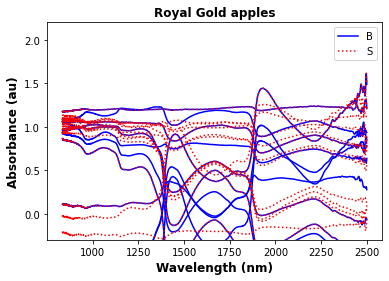

In [95]:

#values to dispaly
Plotx_rg=Xrg.to_numpy(dtype= 'float')
Ploty_rg=Yrg.to_numpy(dtype= 'str')

Plotx_rg=Plotx_rg[randRg,: ]
Ploty_rg=Ploty_rg[randRg]

S_flag=(Ploty_rg=='S')
B_flag=(Ploty_rg=='B')

#
plt.figure(figsize=(6, 4))

# Since we are plotting a 2D numpy array, we will need to be carful with the labels, as we will need just one label to present the type of graph (S, B) 

plt.plot(np.array(Xrg.columns),np.transpose(Plotx_rg[B_flag,:])[:,:1],'b-', label = "B") # just graph the first wavelength of type 'B' with the lables 
plt.plot(np.array(Xrg.columns),np.transpose(Plotx_rg[B_flag,:])[:,1:],'b-') # graphs the rest of the wavelengths of type 'B' without thier labels 
    
# We make the second curve dashed so that it doesn't cover up the first
plt.plot(np.array(Xrg.columns),np.transpose(Plotx_rg[S_Flag,:])[:,:1],'r:', label = "S")  # just graph the first wavelength of type 'S' without the lables
plt.plot(np.array(Xrg.columns),np.transpose(Plotx_rg[S_Flag,:])[:,1:],'r:') # graphs the rest of the wavelengths of type 'S' without thier labels

plt.title("Royal Gold apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Wavelength (nm)", fontweight ='bold', fontsize =12)
plt.ylabel("Absorbance (au)", fontweight ='bold', fontsize =12)
plt.ylim([-.3,2.2])

plt.legend()

plt.show()

<b><i> Saving data for later use </i></b>

We can save the data so that we can call it up again in subsequent notebooks

In [97]:
# ___Cell no. 14___
%store  X
%store  Y
%store  df

Stored 'X' (DataFrame)
Stored 'Y' (Series)
Stored 'df' (DataFrame)


`Notice:` this is not a good way of saving the data, especially when working with 3 datasets.

**Exercise 6:** come up with a better way to save the data.

In [98]:
%store  Xgd
%store  Ygd
%store  gd

%store  Xrg
%store  Yrg
%store  rg

Stored 'Xgd' (DataFrame)
Stored 'Ygd' (Series)
Stored 'gd' (DataFrame)
Stored 'Xrg' (DataFrame)
Stored 'Yrg' (Series)
Stored 'rg' (DataFrame)


---